In [50]:
import pandas as pd
import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import aequitas.plot as ap
from aequitas.plotting import Plot

# import warnings; warnings.simplefilter('ignore')

%matplotlib inline

In [30]:
df = pd.read_csv(r"C:\Users\chris\Desktop\adult_rf_binary.csv")
df.head()


,entity_id,label_value,score,education,gender,race
0,5794,1,1.0,HS-grad,Male,White
1,26705,0,1.0,Assoc-voc,Female,White
2,3474,0,1.0,Bachelors,Female,White
3,31797,0,1.0,Some-college,Male,White
4,26674,0,0.0,Bachelors,Male,White


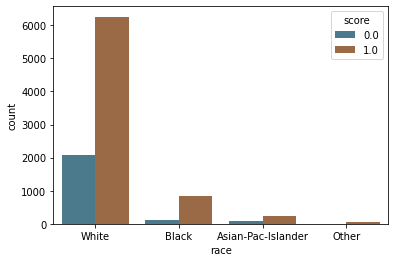

In [31]:
df.shape
aq_palette = sns.diverging_palette(225, 35, n=2)
by_race = sns.countplot(x="race", hue="score", data=df[df.race.isin(['Black', 'White','Asian-Pac-Islander',' Amer-Indian-Eskimo','Other'])], palette=aq_palette)

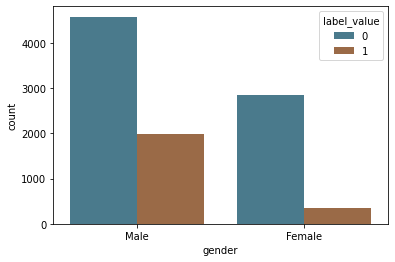

In [61]:
by_sex = sns.countplot(x="gender", hue="label_value", data=df, palette=aq_palette)

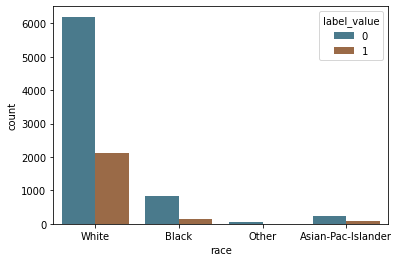

In [60]:
label_by_race = sns.countplot(x="race", hue="label_value", data=df[df.race.isin(['Black', 'White','Asian-Pac-Islander',' Amer-Indian-Eskimo','Other'])], palette=aq_palette)

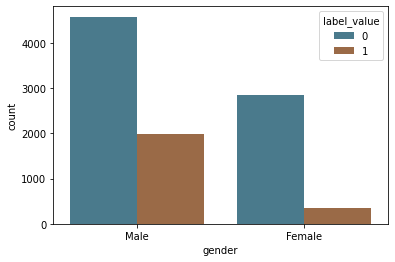

In [33]:
label_by_sex = sns.countplot(x="gender", hue="label_value", data=df, palette=aq_palette)


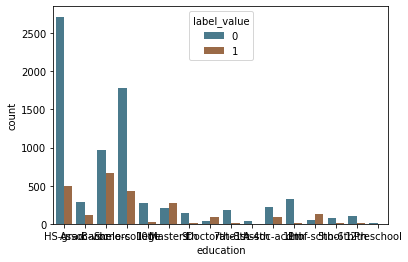

In [34]:
label_by_education = sns.countplot(x="education", hue="label_value", data=df, palette=aq_palette)


In [35]:
g = Group()
xtab, _ = g.get_crosstabs(df)
absolute_metrics = g.list_absolute_metrics(xtab)

In [37]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,education,10th,0.72,0.00,1.00,0.95,1.00,0.28,0.00,0.05,0.04,0.98,0.06
1,education,11th,0.47,0.01,0.73,0.98,0.99,0.53,0.27,0.02,0.04,0.97,0.04
2,education,12th,0.75,0.02,0.50,0.95,0.98,0.25,0.50,0.05,0.01,0.97,0.07
3,education,1st-4th,0.50,0.02,0.50,0.98,0.98,0.50,0.50,0.02,0.01,0.96,0.04
4,education,5th-6th,0.75,0.00,1.00,0.96,1.00,0.25,0.00,0.04,0.01,0.99,0.05
5,education,7th-8th,1.00,0.02,0.00,0.96,0.98,0.00,1.00,0.04,0.02,0.98,0.04
6,education,9th,0.75,0.01,0.67,0.96,0.99,0.25,0.33,0.04,0.02,0.98,0.05
7,education,Assoc-acdm,0.36,0.11,0.71,0.86,0.89,0.64,0.29,0.14,0.03,0.74,0.29
8,education,Assoc-voc,0.42,0.12,0.67,0.83,0.88,0.58,0.33,0.17,0.04,0.74,0.30
9,education,Bachelors,0.22,0.22,0.71,0.84,0.78,0.78,0.29,0.16,0.12,0.55,0.41


In [38]:
b = Bias()

In [39]:
bdf = b.get_disparity_predefined_groups(xtab, original_df=df, 
                                        ref_groups_dict={'race':'White', 'gender':'Male','education':'10th'}, 
                                        alpha=0.05, check_significance=True, 
                                        mask_significance=True)
bdf.style

get_disparity_predefined_group()


C:\Users\chris\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\morestats.py:2603: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom
C:\Users\chris\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\morestats.py:2603: RuntimeWarning: divide by zero encountered in double_scalars
  W = numer / denom
C:\Users\chris\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\chris\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\chris\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\chris\

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,label_value_significance,score_significance,fdr_disparity,fdr_ref_group_value,fdr_significance,fnr_disparity,fnr_ref_group_value,fnr_significance,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,ppr_significance,pprev_disparity,pprev_ref_group_value,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,0,binary 0/1,7495,education,10th,0.722222,0.000000,1.000000,0.954704,1.000000,0.277778,0.000000,0.045296,287,5,0.038292,0.982877,274,5,0,13,18,274,292,9769,0.061644,0,0,1.000000,10th,0,1.000000,10th,None,1.000000,10th,None,1.000000,10th,0,nan,10th,None,1.000000,10th,0,1.000000,10th,0,1.000000,10th,0,nan,10th,0,1.000000,10th,None
1,0,binary 0/1,7495,education,11th,0.466667,0.009202,0.727273,0.978788,0.990798,0.533333,0.272727,0.021212,330,11,0.044029,0.967742,323,8,3,7,15,326,341,9769,0.043988,0,0,1.025227,10th,0,1.920000,10th,0,0.727273,10th,0,0.990798,10th,0,10.000000,10th,0,1.149826,10th,0,0.984602,10th,0,0.468298,10th,0,10.000000,10th,0,0.646154,10th,0
2,0,binary 0/1,7495,education,12th,0.750000,0.018519,0.500000,0.946429,0.981481,0.250000,0.500000,0.053571,112,4,0.014943,0.965517,106,2,2,6,8,108,116,9769,0.068966,0,0,0.991332,10th,0,0.900000,10th,0,0.500000,10th,0,0.981481,10th,0,10.000000,10th,0,0.390244,10th,0,0.982338,10th,0,1.182692,10th,0,10.000000,10th,0,1.038462,10th,0
3,0,binary 0/1,7495,education,1st-4th,0.500000,0.023256,0.500000,0.976744,0.976744,0.500000,0.500000,0.023256,43,2,0.005737,0.955556,42,1,1,1,2,43,45,9769,0.044444,0,0,1.023086,10th,0,1.800000,10th,0,0.500000,10th,0,0.976744,10th,0,10.000000,10th,0,0.149826,10th,0,0.972203,10th,0,0.513417,10th,0,10.000000,10th,0,0.692308,10th,0
4,0,binary 0/1,7495,education,5th-6th,0.750000,0.000000,1.000000,0.961538,1.000000,0.250000,0.000000,0.038462,78,1,0.010407,0.987342,75,1,0,3,4,75,79,9769,0.050633,0,0,1.007159,10th,0,0.900000,10th,None,1.000000,10th,None,1.000000,10th,0,nan,10th,None,0.271777,10th,0,1.004543,10th,0,0.849112,10th,0,nan,10th,0,1.038462,10th,None
5,0,binary 0/1,7495,education,7th-8th,1.000000,0.017045,0.000000,0.961111,0.982955,0.000000,1.000000,0.038889,180,3,0.024016,0.983607,173,0,3,7,7,176,183,9769,0.038251,0,0,1.006711,10th,0,0.000000,10th,1,0.000000,10th,1,0.982955,10th,0,10.000000,10th,1,0.627178,10th,0,1.000743,10th,0,0.858547,10th,0,10.000000,10th,0,1.384615,10th,1
6,0,binary 0/1,7495,education,9th,0.750000,0.006993,0.666667,0.959459,0.993007,0.250000,0.333333,0.040541,148,3,0.019746,0.980132,142,2,1,6,8,143,151,9769,0.052980,0,0,1.004981,10th,0,0.900000,10th,0,0.666667,10th,0,0.993007,10th,0,10.000000,10th,0,0.515679,10th,0,0.997208,10th,0,0.895010,10th,0,10.000000,10th,0,1.038462,10th,0
7,0,binary 0/1,7495,education,Assoc-acdm,0.356322,0.106481,0.708861,0.861607,0.893519,0.643678,0.291139,0.138393,224,79,0.029887,0.739274,193,56,23,31,87,216,303,9769,0.287129,1,1,0.902486,10th,1,2.317241,10th,0,0.708861,10th,0,0.893519,10th,1,10.000000,10th,0,0.780488,10th,1,0.752153,10th,1,3.055288,10th,1,10.000000,10th,1,0.493369,10th,0
8,0,binary 0/1,7495,education,Assoc-voc,0.416667,0.118881,0.673077,0.834437,0.881119,0.583333,0.326923,0.165563,302,104,0.040294,0.743842,252,70,34,50,120,286,406,9769,0.295567,1,1,0.874027,10th,1,2.100000,10th,0,0.673077,10th,0,0.881119,10th,1,10.000000,10th,0,1.052265,10th,1,0.756801,10th,1,3.655120,10th,1,10.000000,10th,1,0.576923,10th,0
9,0,binary 0/1,7495,education,Bachelors,0.218045,0.223371,0.706522,0.838170,0.776629,0.781955,0.293478,0.161830,896,736,0.119546,0.549020,751,520,216,145,665,967,1632,9769,0.407475,1,1,0.877937,10th,1,2.815038,10th,0,0.706522,10

In [13]:
# View disparity metrics added to dataframe
bdf[['attribute_name', 'attribute_value'] +
     b.list_disparities(bdf) + b.list_significance(bdf)].style

,attribute_name,attribute_value,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity,label_value_significance,score_significance,fdr_significance,fnr_significance,for_significance,fpr_significance,npv_significance,ppr_significance,pprev_significance,precision_significance,tnr_significance,tpr_significance
0,education,10th,1.000000,1.000000,1.000000,1.000000,nan,1.000000,1.000000,1.000000,nan,1.000000,0,0,0,None,None,0,None,0,0,0,0,None
1,education,11th,1.025227,1.920000,0.727273,0.990798,10.000000,1.149826,0.984602,0.468298,10.000000,0.646154,0,0,0,0,0,0,0,0,0,0,0,0
2,education,12th,0.991332,0.900000,0.500000,0.981481,10.000000,0.390244,0.982338,1.182692,10.000000,1.038462,0,0,0,0,0,0,0,0,0,0,0,0
3,education,1st-4th,1.023086,1.800000,0.500000,0.976744,10.000000,0.149826,0.972203,0.513417,10.000000,0.692308,0,0,0,0,0,0,0,0,0,0,0,0
4,education,5th-6th,1.007159,0.900000,1.000000,1.000000,nan,0.271777,1.004543,0.849112,nan,1.038462,0,0,0,None,None,0,None,0,0,0,0,None
5,education,7th-8th,1.006711,0.000000,0.000000,0.982955,10.000000,0.627178,1.000743,0.858547,10.000000,1.384615,0,0,0,1,1,0,1,0,0,0,0,1
6,education,9th,1.004981,0.900000,0.666667,0.993007,10.000000,0.515679,0.997208,0.895010,10.000000,1.038462,0,0,0,0,0,0,0,0,0,0,0,0
7,education,Assoc-acdm,0.902486,2.317241,0.708861,0.893519,10.000000,0.780488,0.752153,3.055288,10.000000,0.493369,1,1,1,0,0,1,0,1,1,1,1,0
8,education,Assoc-voc,0.874027,2.100000,0.673077,0.881119,10.000000,1.052265,0.756801,3.655120,10.000000,0.576923,1,1,1,0,0,1,0,1,1,1,1,0
9,education,Bachelors,0.877937,2.815038,0.706522,0.776629,10.000000,3.121951,0.558584,3.572716,10.000000,0.301909,1,1,1,0,0,1,0,1,1,1,1,0


In [69]:
metrics = ['fpr','fdr','tpr']
disparity_tolerance = 1.25

In [70]:
ap.summary(bdf, metrics, fairness_threshold = disparity_tolerance)

alt.VConcatChart(...)

In [71]:
ap.disparity(bdf, metrics, 'race', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [42]:
ap.disparity(bdf, metrics, 'gender', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [67]:
ap.disparity(bdf, metrics, 'education', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [43]:
ap.absolute(bdf, metrics, 'race', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [44]:
ap.absolute(bdf, metrics, 'gender', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [45]:
ap.absolute(bdf, metrics, 'education', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [46]:
metrics1 = ['for']
disparity_tolerance1=1.25
ap.summary(bdf,metrics1,'race',fairness_threshold = disparity_tolerance1)
ap.disparity(bdf,metrics1,'race',fairness_threshold = disparity_tolerance1)

alt.LayerChart(...)

In [47]:
ap.absolute(bdf, metrics1, 'race', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [24]:
metrics2 = ['fnr']
disparity_tolerance1=1.25
ap.disparity(bdf,metrics1,'race',fairness_threshold = disparity_tolerance1)

alt.LayerChart(...)

In [68]:
ap.summary(bdf,metrics2,'race',fairness_threshold = disparity_tolerance1)

alt.VConcatChart(...)

In [49]:
ap.summary(bdf,metrics1,'race',fairness_threshold = disparity_tolerance1)

alt.VConcatChart(...)

In [51]:
aqp=Plot()

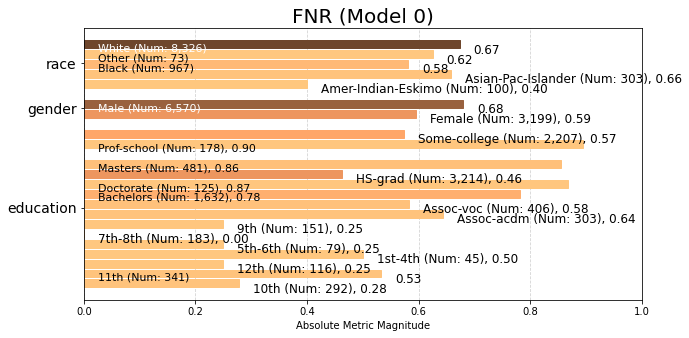

In [52]:
fnr = aqp.plot_group_metric(xtab, 'fnr')

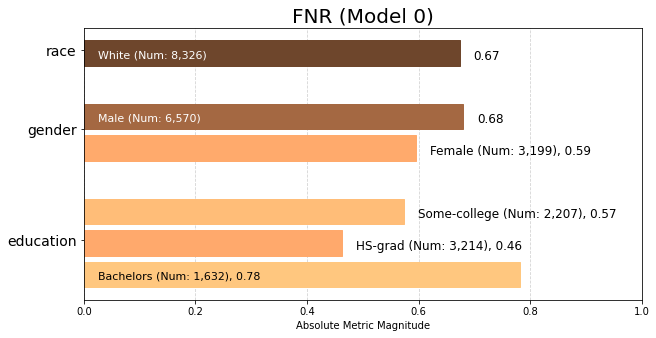

In [53]:
fnr = aqp.plot_group_metric(xtab, 'fnr', min_group_size=0.05)


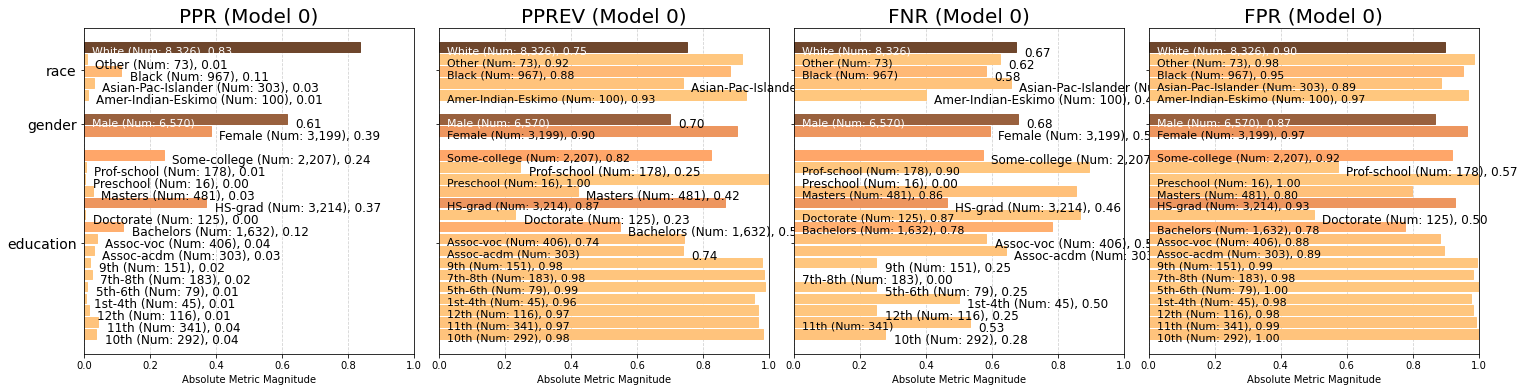

<Figure size 432x288 with 0 Axes>

In [54]:

p = aqp.plot_group_metric_all(xtab, metrics=['ppr','pprev','fnr','fpr'], ncols=4)

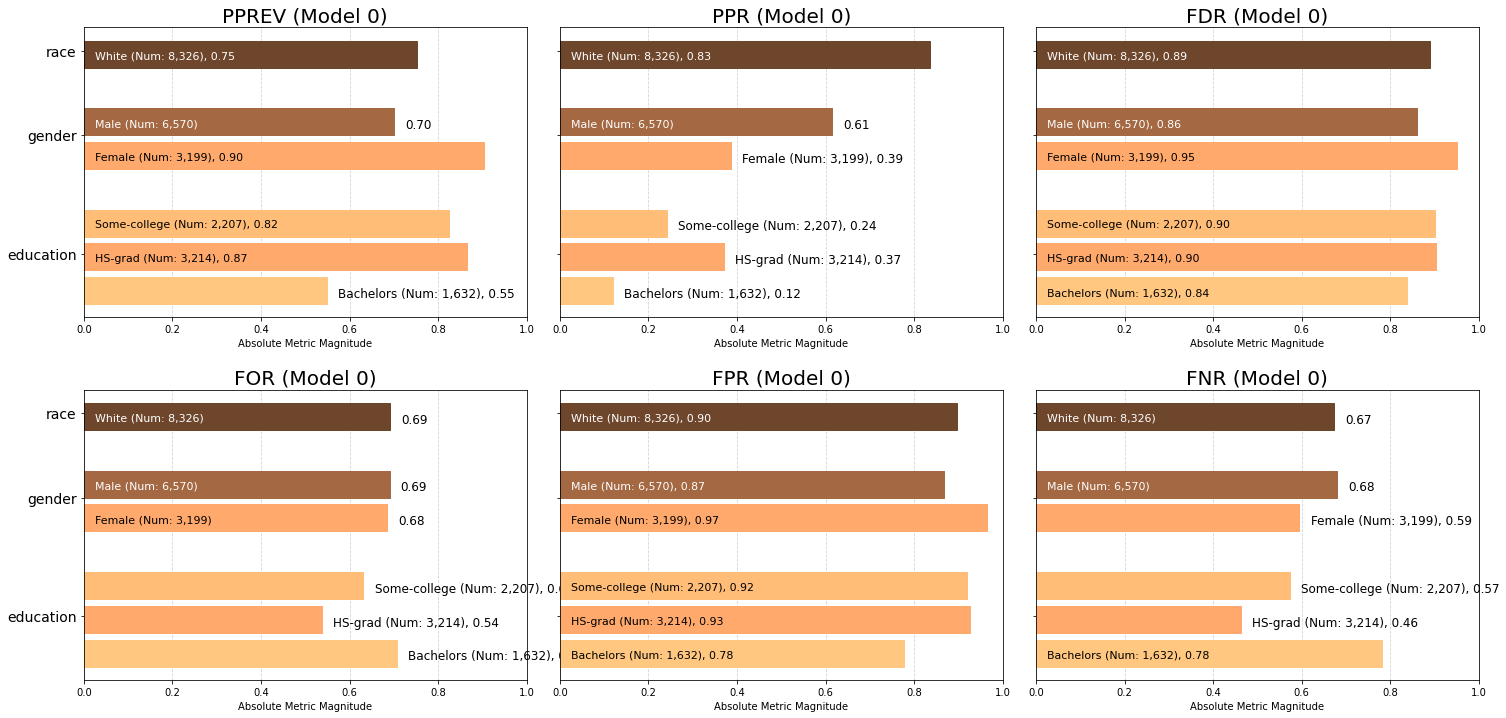

<Figure size 432x288 with 0 Axes>

In [65]:
a = aqp.plot_group_metric_all(xtab, ncols=3, min_group_size=0.05)

In [56]:
ap.summary(bdf,metrics1,'gender',fairness_threshold = disparity_tolerance1)

alt.VConcatChart(...)

In [58]:
ap.summary(bdf,metrics,'gender',fairness_threshold = disparity_tolerance1)

alt.VConcatChart(...)

In [62]:
metrics3 = ['fnr','for','fpr','fdr','tpr']
disparity_tolerance3=1.25
ap.summary(bdf,metrics3,'gender',fairness_threshold = disparity_tolerance3)

alt.VConcatChart(...)

In [66]:
ap.summary(bdf,metrics3,'race',fairness_threshold = disparity_tolerance3)

alt.VConcatChart(...)